In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
#Data set citation
#Faroudja ABID et al. , Predicting Forest Fire in Algeria using Data Mining Techniques: 
#Case Study of the Decision Tree Algorithm, 
#International Conference on Advanced Intelligent Systems for Sustainable Development (AI2SD 2019) , 
#08 - 11 July , 2019, Marrakech, Morocco.

#General Information
#The dataset contains atmospheric and Fire Watch Index (FWI) attributes and a class label whether or not a forest fire
#occured on that day. It contains recording froms two regions in Algeria (Bejaia region and Sidi-Bel Abbes region).
#The model will be trained off of the Bejaia data set. Bejaia and Sidi datasets were seperated through excel. There was also
#some random white space within the column names so those were fixed in excel aswell

#Attribute Information 
#day, month, and year is when the measurements were recorded
#Temperature is in celcius
#RH is the relative humidity which is a percentage equal to the amount of water vapor in the air divided by the amount 
#required for saturation
#Ws is wind speed in km/h
#Rain is amount of rainfall in mm

#FWI Compenents information found on https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi
#FFMC is Fine Fuel Moisture Code which is calculated from Temperature, RH, WS, and Rain. Measures moisture content of forest 
#litter like grass and leaves
#DMC is Duff Moisture Code which is calculated from Temperature, RH, and Rain. Measures moisture content of a duff which is 
#an organic layer that is below litter that is somewhat compacted.
#DC is Drought Code which is calculated from Tempearture and Rain. Measures moisture content of deep compacted organic layers 
#below duff like dead logs.
#ISI is Initial Spread Index which is calculated from FFMC and Ws and measures how a forest fire will spread.
#BUI is Build Up Index which is calcuated from DMC and DC and measures the amount of fuel that can experience combustion.
#FWI is Fire Weather Index which is calculated from BUI and ISI and measures intensity of a fire

In [4]:
bejaia_data = pd.read_csv('Bajaia_FF_Data.csv')
bejaia_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [5]:
bejaia_data.info()

#The dataset contains 122 entries and each column has 122 non null data points. Therefore there are no missing values in the
#dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [6]:
bejaia_data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [7]:
bejaia_data.drop(columns = ['day', 'month', 'year'] , inplace = True)

#We don't need the day, month, or year in our model so we can drop these variables because the model shouldn't be trained 
#off these values.

In [8]:
bejaia_data['Classes'].unique()

#Random white space in the Classes attributes

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire '],
      dtype=object)

In [9]:
bejaia_data['Classes'] = bejaia_data['Classes'].str.strip()

#There is random white space that exists in the Classes attribute. We can remove that white space by calling a strip function.

In [10]:
bejaia_data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [11]:
bejaia_data['Classes'].value_counts()

not fire    63
fire        59
Name: Classes, dtype: int64

In [12]:
mapping = {"fire": 1, "not fire": 0}

bejaia_data['Classes'] = bejaia_data['Classes'].map(mapping)

bejaia_data['Classes'].value_counts()

#Changes the Classes object datatype into a 1 or 0. 1 is fire and 0 is not fire. This is required in order to train the models.

0    63
1    59
Name: Classes, dtype: int64

<AxesSubplot:>

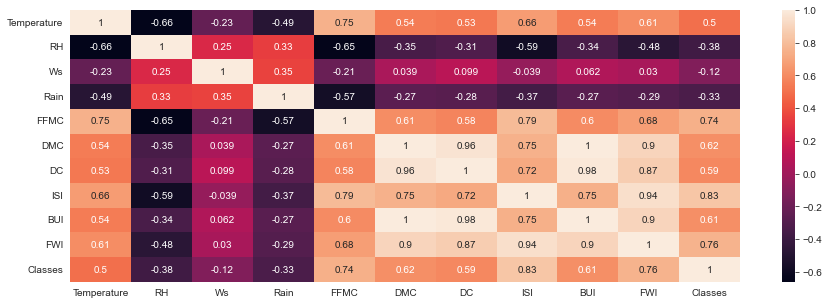

In [13]:
sns.heatmap(bejaia_data.corr(), annot = True)
#There is alot correlation between attributes, especially with the FWI components this is because they are all calculated
#from the same values being Temperature, RH, Ws, and Rain.

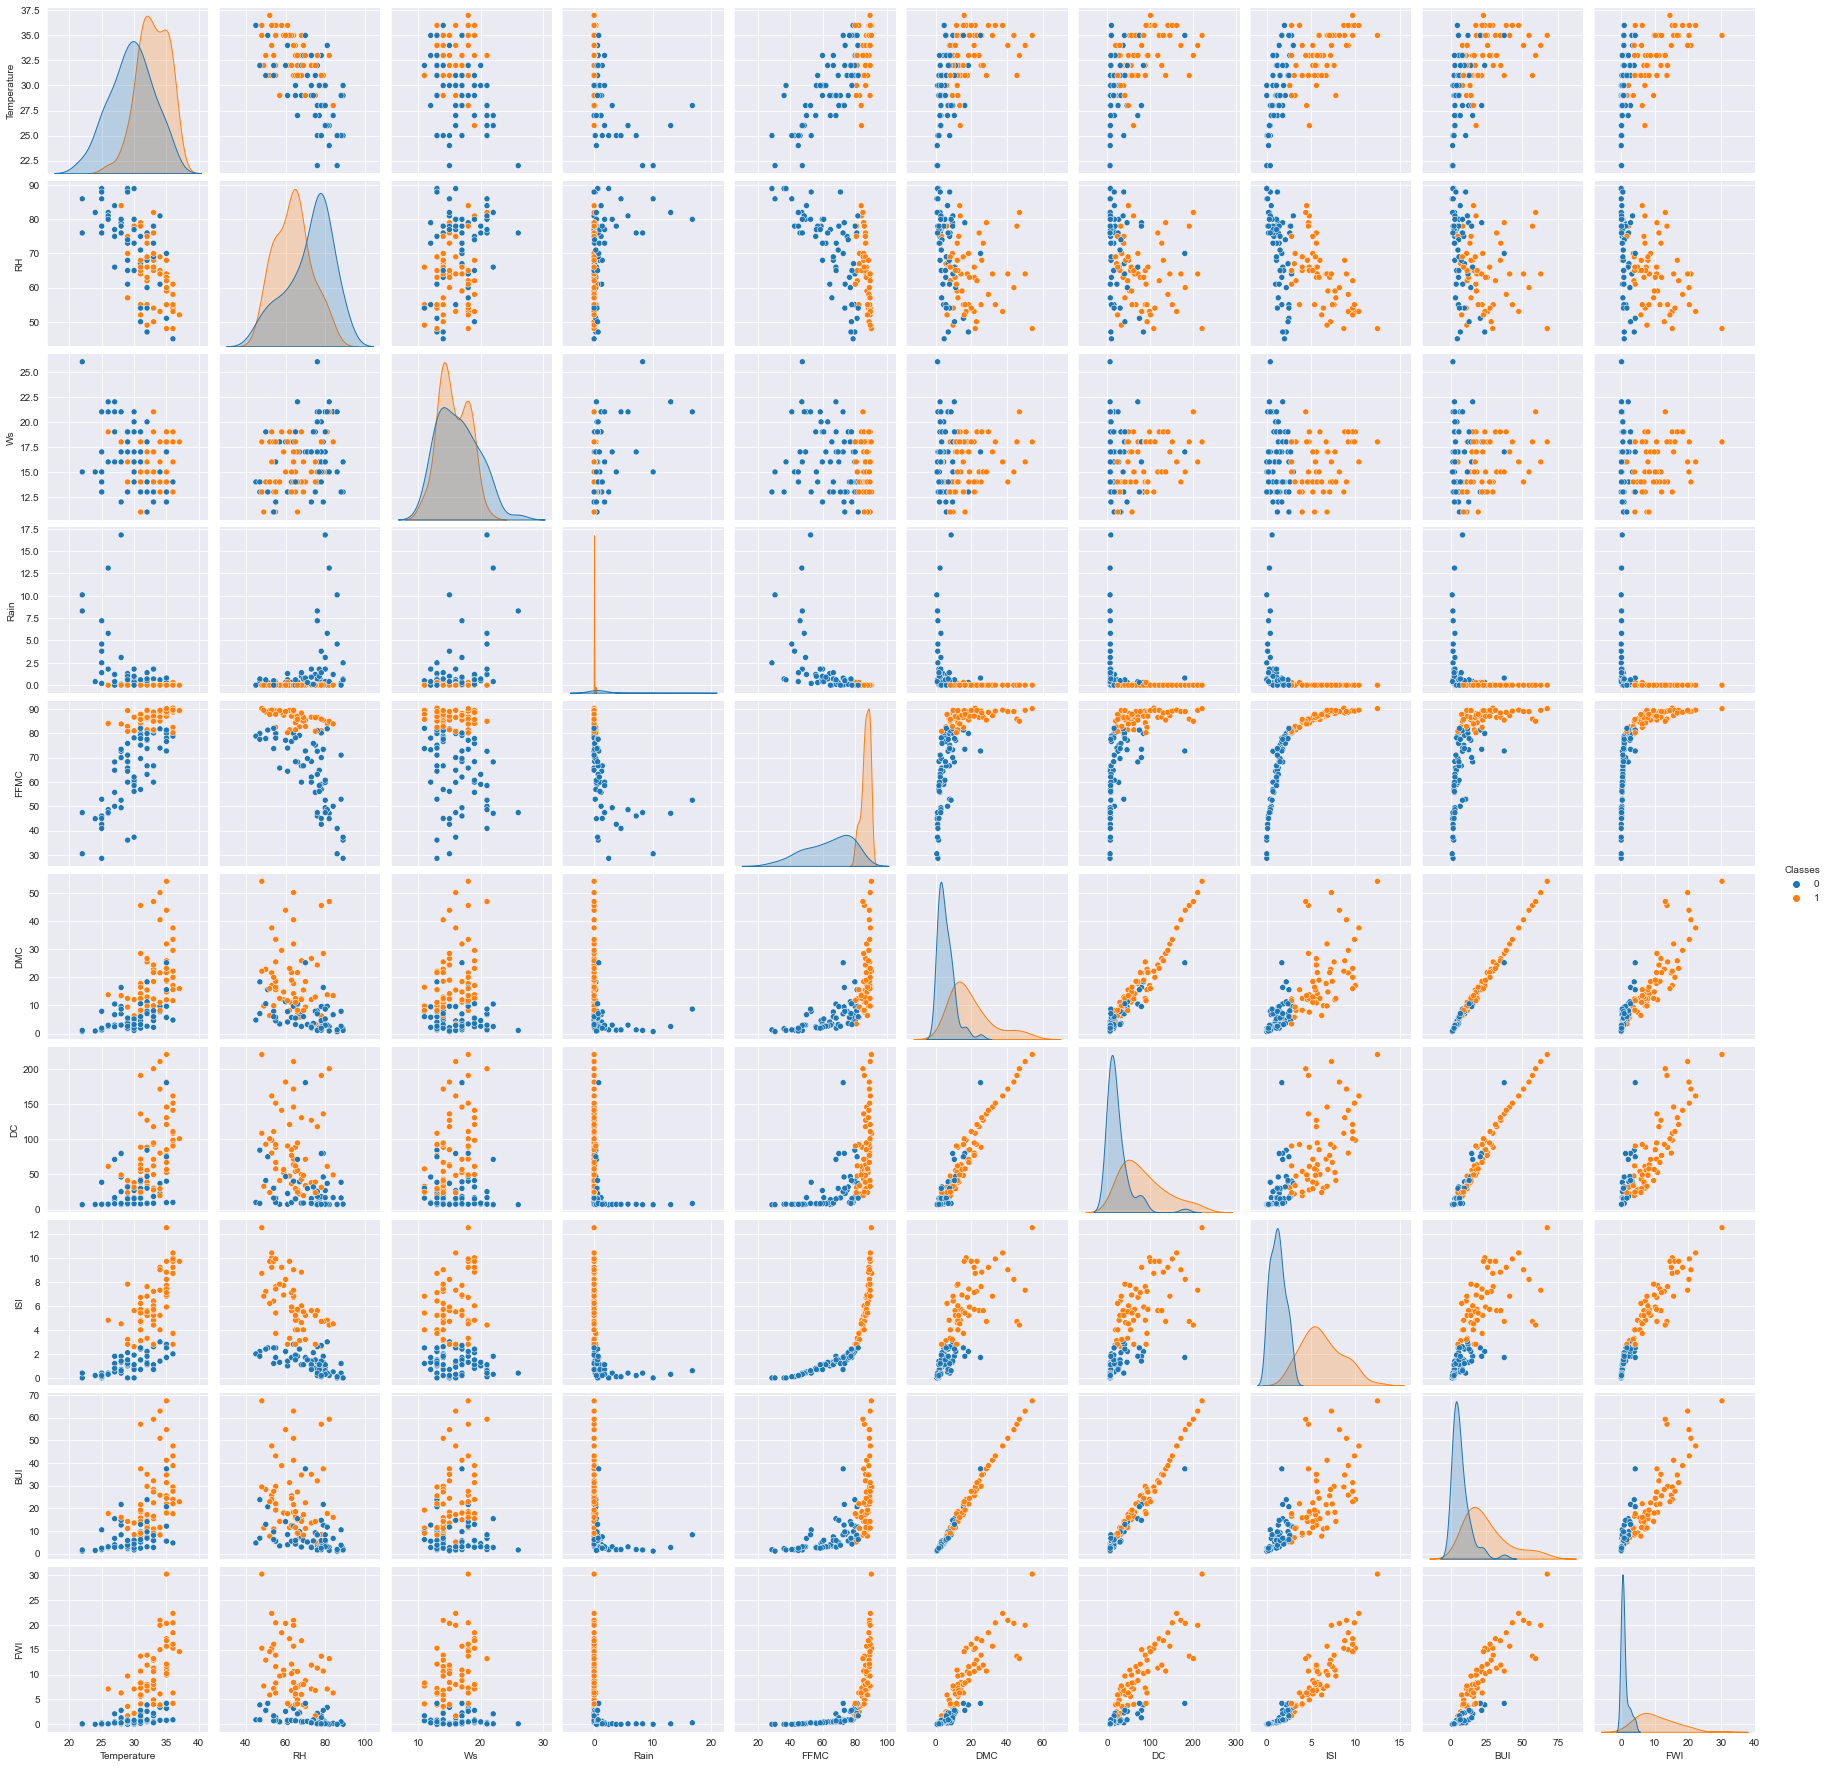

In [14]:
sns.pairplot(data = bejaia_data, hue = 'Classes')

In [15]:
bejaia_data.drop(columns = ['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] , inplace = True)
#If you want to include or remove the FWI components change the comment above

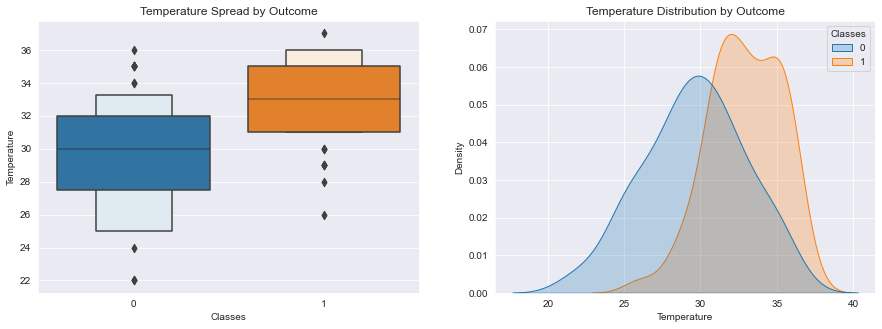

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.boxenplot(x = bejaia_data['Classes'], y = bejaia_data['Temperature'], ax=axes[0])
ax=axes[0].set_title('Temperature Spread by Outcome')

sns.kdeplot(x = bejaia_data['Temperature'], hue = bejaia_data['Classes'], fill = True, ax=axes[1])
ax=axes[1].set_title('Temperature Distribution by Outcome')



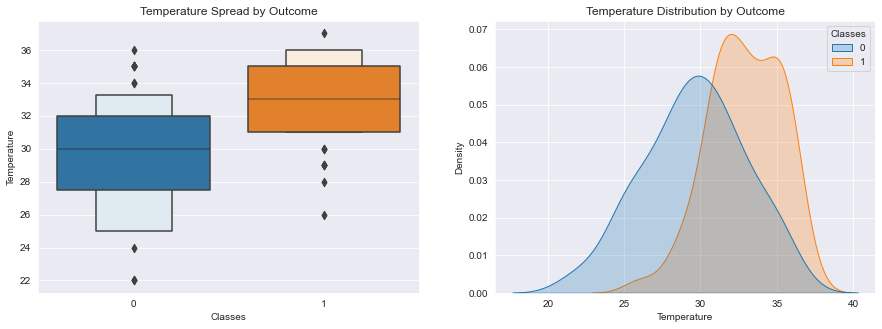

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.boxenplot(x = bejaia_data['Classes'], y = bejaia_data['Temperature'], ax=axes[0])
ax=axes[0].set_title('Temperature Spread by Outcome')

sns.kdeplot(x = bejaia_data['Temperature'], hue = bejaia_data['Classes'], fill = True, ax=axes[1])
ax=axes[1].set_title('Temperature Distribution by Outcome')


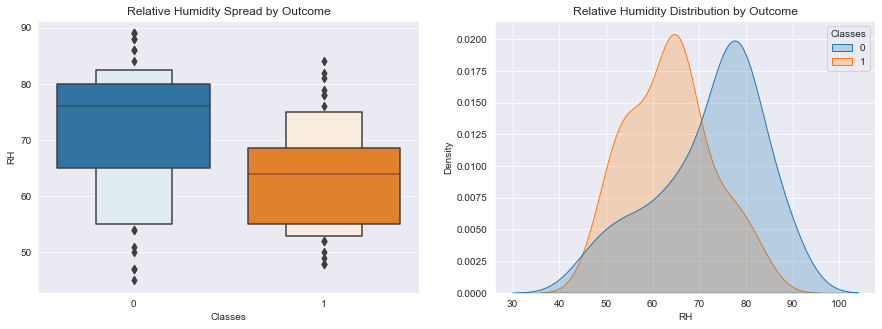

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.boxenplot(x = bejaia_data['Classes'], y = bejaia_data['RH'], ax=axes[0])
ax=axes[0].set_title('Relative Humidity Spread by Outcome')

sns.kdeplot(x = bejaia_data['RH'], hue = bejaia_data['Classes'], fill = True, ax=axes[1])
ax=axes[1].set_title('Relative Humidity Distribution by Outcome')

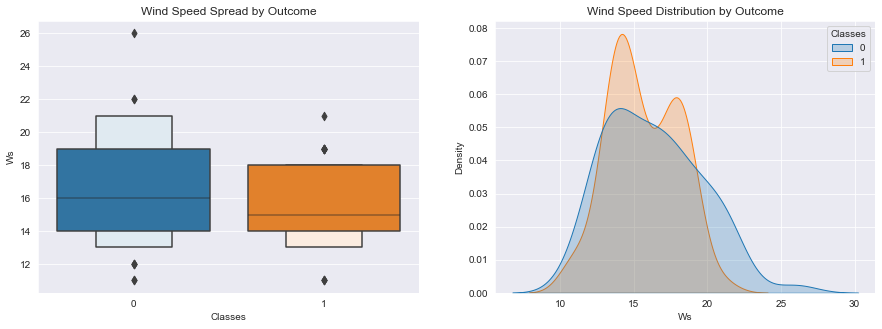

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.boxenplot(x = bejaia_data['Classes'], y = bejaia_data['Ws'], ax=axes[0])
ax=axes[0].set_title('Wind Speed Spread by Outcome')

sns.kdeplot(x = bejaia_data['Ws'], hue = bejaia_data['Classes'], fill = True, ax=axes[1])
ax=axes[1].set_title('Wind Speed Distribution by Outcome')

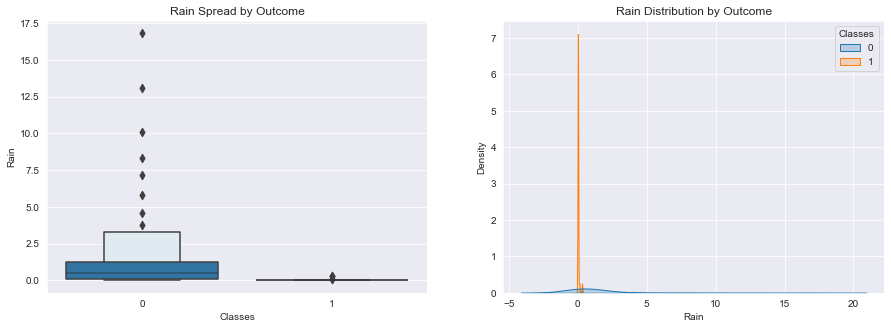

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.boxenplot(x = bejaia_data['Classes'], y = bejaia_data['Rain'], ax=axes[0])
ax=axes[0].set_title('Rain Spread by Outcome')

sns.kdeplot(x = bejaia_data['Rain'], hue = bejaia_data['Classes'], fill = True, ax=axes[1])
ax=axes[1].set_title('Rain Distribution by Outcome')

In [21]:
from sklearn.preprocessing import StandardScaler

X = bejaia_data.drop('Classes', axis=1)
y = bejaia_data['Classes']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [23]:
from sklearn.svm import SVC


SVM = SVC()

SVM.fit(X_train,y_train)

SVC()

In [24]:
SVM_predictions = SVM.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, SVM_predictions)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[17  4]
 [ 1 15]]

True Positives(TP) =  17

True Negatives(TN) =  15

False Positives(FP) =  4

False Negatives(FN) =  1


In [26]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)


RandomForestClassifier()

In [27]:
from sklearn.metrics import accuracy_score

RF_predictions = RF.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, RF_predictions)))

Model accuracy score: 0.9189


In [ ]:
#The model accuracy for the bejaia dataset was impressive but if there is overfitting, we can test the model against
#the sidi dataset and see the accuracy.

In [28]:
sidi_data = pd.read_csv('Sidi-Bel_Abbes_FF_Data.csv')
sidi_data.drop(columns = ['day', 'month', 'year'] , inplace = True)
sidi_data['Classes'] = sidi_data['Classes'].str.strip()
sidi_data['Classes'] = sidi_data['Classes'].map(mapping)
sidi_data.drop(columns = ['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] , inplace = True)
#If you want to include or remove the FWI components change the comment above


In [29]:
X_sidi = sidi_data.drop('Classes', axis=1)
y_sidi = sidi_data['Classes']

X_scaled_sidi = scaler.fit_transform(X_sidi)
X_sidi = pd.DataFrame(data=X_scaled_sidi, columns=X_sidi.columns)

In [30]:
sidi_svm_predictions = SVM.predict(X_sidi)

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_sidi, sidi_svm_predictions)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[37  6]
 [24 55]]

True Positives(TP) =  37

True Negatives(TN) =  55

False Positives(FP) =  6

False Negatives(FN) =  24


In [32]:
sidi_rf_predictions = RF.predict(X_sidi)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_sidi, sidi_rf_predictions)))

Model accuracy score: 0.7951
